# Details
<b>Model:</b> LSTM RNN Approach <br>
<b>Dataset:</b> BTC 2015-2021 Daily Price <br>
<b>Accuracy:</b> 

# Import dependencies

In [1]:
# Change Keras backend
from keras import backend as K
import os
os.environ['KERAS_BACKEND'] = "cntk"

In [18]:
# install dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Combine and explore dataset

In [3]:
df = pd.read_csv("../datasets/BTC/gemini_BTCUSD_day.csv")

In [4]:
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715
1,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
3,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
4,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
...,...,...,...,...,...,...,...,...
2289,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2290,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2291,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2292,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068


In [5]:
df.rename({"Unix Timestamp": "Timestamp"}, axis=1, inplace=True)

In [6]:
df.set_index('Timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2294 entries, 1642390000000.0 to 1444276800.0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2294 non-null   object 
 1   Symbol  2294 non-null   object 
 2   Open    2294 non-null   float64
 3   High    2294 non-null   float64
 4   Low     2294 non-null   float64
 5   Close   2294 non-null   float64
 6   Volume  2294 non-null   float64
dtypes: float64(5), object(2)
memory usage: 143.4+ KB


In [7]:
df.sort_index(inplace=True)

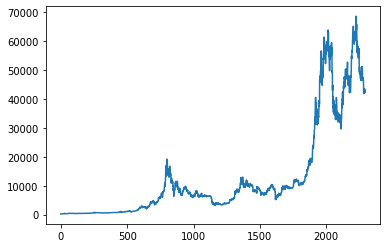

In [8]:
data_close = df['Close']
data_close = data_close.values.reshape(len(data_close), 1)
plt.plot(data_close)
plt.show()

In [9]:
len(data_close)

2294

# Scale dataset

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
scaled = scaler.fit_transform(data_close)
scaled

array([[0.00000000e+00],
       [2.79721714e-05],
       [3.95418129e-05],
       ...,
       [6.26500191e-01],
       [6.21121625e-01],
       [6.14997624e-01]])

# Split dataset to training and testing

In [12]:
# split data into train and test
train_size = int(len(data_close)*0.7) # 70% of the data will be for training
test_size = len(data_close) - train_size # the rest of the data will be for testing (100-70)%

data_train, data_test = data_close[0:train_size, :], data_close[train_size:len(data_close), :]
print('Split data into train and test: ', len(data_train), len(data_test))

Split data into train and test:  1605 689


# Convert to Time Series, reshape to LSTM and build model

In [13]:
# need to now convert the data into time series looking back over a period of days...e.g. use last 7 days to predict price
def create_ts(ds, series):
    X, Y =[], []
    for i in range(len(ds)-series - 1):
        item = ds[i:(i+series), 0]
        X.append(item)
        Y.append(ds[i+series, 0])
    return np.array(X), np.array(Y)

series = 1

trainX, trainY = create_ts(data_train, series)
testX, testY = create_ts(data_test, series)

In [14]:
# reshape into  LSTM format - samples, steps, features
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [15]:
# build the model
model = Sequential()
model.add(LSTM(4, input_shape=(series, 1)))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')
# fit the model
model.fit(trainX, trainY, epochs=100, batch_size=8)

Epoch 1/100
201/201 [==============================] - 2s 2ms/step - loss: 38335080.0000
Epoch 2/100
201/201 [==============================] - 1s 3ms/step - loss: 38335084.0000
Epoch 3/100
201/201 [==============================] - 1s 4ms/step - loss: 38335076.0000
Epoch 4/100
201/201 [==============================] - 1s 4ms/step - loss: 38335084.0000
Epoch 5/100
201/201 [==============================] - 1s 4ms/step - loss: 38335072.0000
Epoch 6/100
201/201 [==============================] - 1s 4ms/step - loss: 38335068.0000
Epoch 7/100
201/201 [==============================] - 1s 4ms/step - loss: 38335076.0000
Epoch 8/100
201/201 [==============================] - 1s 4ms/step - loss: 38335072.0000
Epoch 9/100
201/201 [==============================] - 1s 4ms/step - loss: 38335080.0000
Epoch 10/100
201/201 [==============================] - 1s 4ms/step - loss: 38335068.0000
Epoch 11/100
201/201 [==============================] - 1s 4ms/step - loss: 38335076.0000
Epoch 12/100
201/20

201/201 [==============================] - 1s 3ms/step - loss: 38335080.0000
Epoch 93/100
201/201 [==============================] - 1s 3ms/step - loss: 38335080.0000
Epoch 94/100
201/201 [==============================] - 1s 3ms/step - loss: 38335080.0000
Epoch 95/100
201/201 [==============================] - 1s 3ms/step - loss: 38335092.0000
Epoch 96/100
201/201 [==============================] - 1s 3ms/step - loss: 38335084.0000
Epoch 97/100
201/201 [==============================] - 1s 3ms/step - loss: 38335072.0000
Epoch 98/100
201/201 [==============================] - 1s 3ms/step - loss: 38335076.0000
Epoch 99/100
201/201 [==============================] - 1s 3ms/step - loss: 38335072.0000
Epoch 100/100
201/201 [==============================] - 1s 4ms/step - loss: 38335084.0000


In [16]:
# test this model out
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)

# unscale predictions
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

In [19]:
# lets calculate the root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredictions[:, 0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredictions[:, 0]))
print('Train score: %.2f rmse', trainScore)
print('Test score: %.2f rmse', testScore)

Train score: %.2f rmse 422771178.64862984
Test score: %.2f rmse 2515461475.2393165


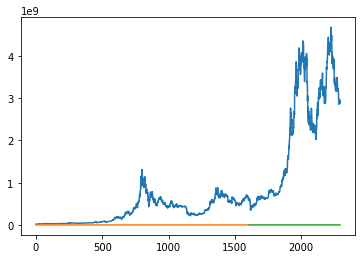

In [20]:
# lets plot the predictions on a graph and see how well it did
train_plot = np.empty_like(data_close)
train_plot[:,:] = np.nan
train_plot[series:len(trainPredictions)+series, :] = trainPredictions

test_plot = np.empty_like(data_close)
test_plot[:,:] = np.nan
test_plot[len(trainPredictions)+(series*2)+1:len(data_close)-1, :] = testPredictions

# plot on graph
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()